In [1]:
from astropy.io import fits
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from astropy.table import hstack, vstack, Table
from astropy.io import ascii
import pdb
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline

In [2]:
dat = ascii.read('full_MP_stdev.csv')

In [3]:
def multiParamFig(dat,testType='FULL3'):
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_axes([0.07, 0.1, 0.6, 0.8])

    #ax = fig.add_subplot(2,1,1)
    #fig, ax = plt.subplots()
    ax.set_xlim(0,2)
    ax.set_ylim(0,2)
    ax.set_xticklabels(['','Off','','On'])
    ax.set_yticklabels(['','Off','','On'])
    ax.set_xlabel('Flat Fielding')
    ax.set_ylabel('IPC Correction')
    ax.text
    patches, colVals = [], []
    for pipeParam in dat:
        paramString = str(pipeParam['Test Name'])
        ipcVal = float(paramString[0]) - 1 ## IPC correction
        linVal = float(paramString[1]) - 1 ## Linearity correction
        ffcVal = float(paramString[2]) - 1 ## Flat Field Correction
        #showString = paramString
        showString = "{0:.2f}".format(pipeParam[testType])
        xPos = ffcVal+ 0.5 * linVal+0.25
        yPos = ipcVal+ 0.5 * linVal+0.25
        ax.text(xPos,yPos,showString,
               verticalalignment='center',horizontalalignment='center')
        if np.mod(xPos,1.0) < 0.5:
            patches.append(Polygon([[ffcVal,ipcVal],[ffcVal+1,ipcVal],[ffcVal,ipcVal+1]]))
        else:
            patches.append(Polygon([[ffcVal,ipcVal+1.],[ffcVal+1,ipcVal+1],[ffcVal+1,ipcVal]]))
        colVals.append(pipeParam[testType])
    #patch = Polygon([[0,0],[1,0],[0,1]])
    p = PatchCollection(patches,cmap=plt.cm.Blues,alpha=0.4)
    #p.set_array(np.array(0.5))
    p.set_array(np.array(colVals))
    #p.set_array(100*np.random.rand(len(patches)))
    ax.add_collection(p)

    fig.colorbar(p,label='$\sigma$ (ppm)')
    ## The second plot is a sort or legend to explain the third parameter
    ax2 = fig.add_axes([0.75,0.1,0.1,0.15])
    ax2.set_xticklabels([''])
    ax2.set_xlim(0,1)
    ax2.set_xticks([0,.5,1])
    ax2.set_yticklabels([''])
    ax2.set_ylim(0,1)
    ax2.set_yticks([0,0.5,1])
    ax2.text(-0.1,1.1,'Linearity Correction',rotation=45,
            verticalalignment='center',horizontalalignment='center')
    patch = Polygon([[0,0],[1,0],[0,1]],facecolor=plt.cm.Blues(0),alpha=0.4)
    ax2.plot([0,1],[1,0],color='k')
                   #edgecolor='k',linewidth=3)
    
    ax2.add_patch(patch)
    ax2.text(0.25,.25,'off')
    ax2.text(.75,.75,'on',verticalalignment='center',horizontalalignment='center')
    fig.savefig(os.path.join('plots',testType+'.png'),dpi=150)

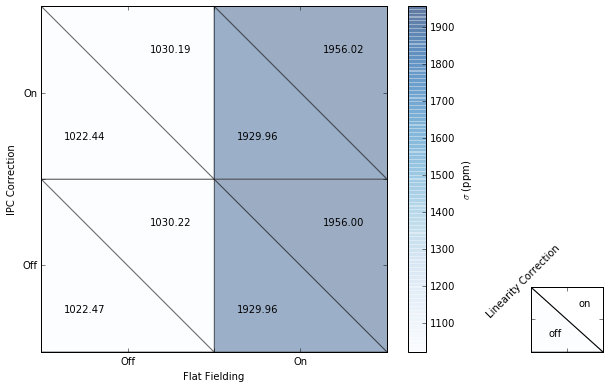

In [6]:
multiParamFig(dat,testType='FULL3')

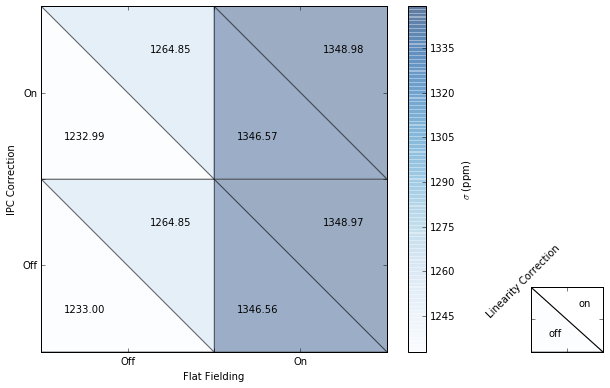

In [7]:
multiParamFig(dat,testType='FULL4')

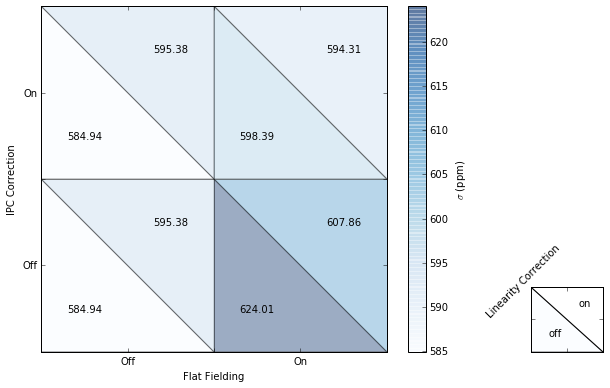

In [8]:
multiParamFig(dat,testType='WLP8SUB')

KeyError: 'ES-WLP8SUB'

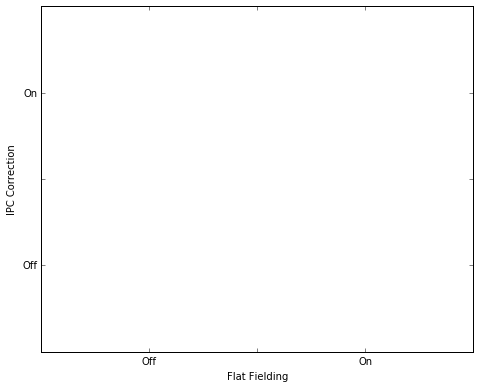

In [9]:
multiParamFig(dat,testType='ES-WLP8SUB')


KeyError: 'ES-FULL4'

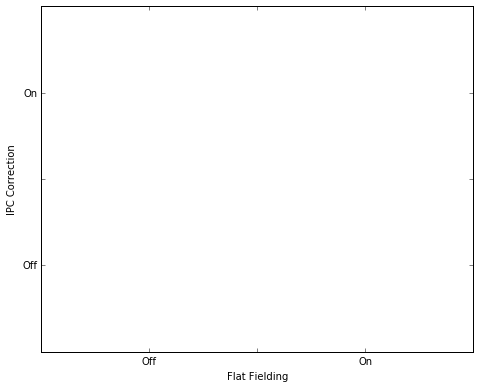

In [10]:
multiParamFig(dat,testType='ES-FULL4')